# Score d’appétence de la carte visa premier

**Résumé**:
liste des variables explicatives quantitatives
varquant=var[1:30]
liste des variables explicatives qualitatives
varqual=var[31:55]

# 1. Construction des échantillons apprentissage

Afin de pouvoir comparer R et python, nous prendrons les échantillons d'apprentissage et de test du script R

In [4]:
import pandas as pd
import numpy as np


# Lecture des données
## Charger les données ou les lire directement en précisant le chemin
path=""
visappt=pd.read_csv(path+"visappt.dat",sep=" ",header=0)
vistest=pd.read_csv(path+"vistest.dat",sep=" ",header=0)
# Vérification du contenu
visappt.head()

,familr,sexer,RELAT,AGER,OPGNBL,MOYRVL,TAVEPL,ENDETL,GAGETL,GAGECL,...,relatq,qsmoyq,opgnbq,moyrvq,tavepq,dmvtpq,boppnq,jnbjdq,itavcq,CARVP
0,1,0,238,51,0.000000,4.753590,13.461603,1.609438,11.688701,0.000000,...,R2,Q2,O0,M2,T2,D0,B2,J1,I2,Coui
1,0,0,89,49,0.000000,5.926926,13.067592,0.000000,12.250391,10.541650,...,R1,Q2,O0,M2,T2,D0,B2,J1,I2,Coui
2,1,0,216,64,1.791759,3.218876,11.270382,0.000000,0.000000,0.000000,...,R2,Q1,O2,M2,T2,D0,B2,J1,I2,Coui
3,0,0,188,38,1.098612,3.295837,0.000000,1.791759,10.268964,10.268964,...,R2,Q1,O2,M2,T0,D1,B1,J1,I1,Coui
4,1,1,135,46,1.098612,3.713572,11.480991,0.000000,0.000000,0.000000,...,R1,Q1,O2,M2,T2,D0,B2,J2,I2,Coui


In [17]:
# liste des variables explicatives quantitatives
var=visappt.columns
varquant=var[0:30]
# liste des variables explicatives qualitatives
varqual=var[30:55]

In [23]:
# Affectation des types de variables
for i in varqual:
    visappt[i]=pd.Categorical(visappt[i],ordered=False)
    vistest[i]=pd.Categorical(vistest[i],ordered=False)

In [24]:
visappt.dtypes

familr       int64
sexer        int64
RELAT        int64
AGER         int64
OPGNBL     float64
MOYRVL     float64
TAVEPL     float64
ENDETL     float64
GAGETL     float64
GAGECL     float64
GAGEML     float64
KVUNB        int64
QSMOY        int64
QCREDL     float64
DMVTPL     float64
BOPPNL     float64
FACANL     float64
LGAGTL     float64
VIENB        int64
VIEMTL     float64
UEMNB        int64
XLGNB        int64
XLGMTL     float64
YLVNB        int64
YLVMTL     float64
ROCNB        int64
NPTAG        int64
ITAVCL     float64
HAVEFL     float64
JNBJDL     float64
SEXEQ     category
FAMIQ     category
PCSPQ     category
kvunbq    category
vienbq    category
uemnbq    category
xlgnbq    category
ylvnbq    category
rocnbq    category
nptagq    category
endetq    category
gagetq    category
facanq    category
lgagtq    category
havefq    category
ageq      category
relatq    category
qsmoyq    category
opgnbq    category
moyrvq    category
tavepq    category
dmvtpq    category
boppnq    ca

In [48]:
# Transformation des variables qualitatives en indicatrices et séparation des variables quantitatives
# Echantillon Apprentissage
visapptq=pd.get_dummies(visappt[varqual])
visapptr=visappt[varquant]
Y=visappt["CARVP"]
Y[Y=='Coui']=1
Y[Y=='Cnon']=0
Y=Y.map(lambda x: int(x))

# Echantillon Test
vistestq=pd.get_dummies(vistest[varqual])
vistestr=vistest[varquant]
Y_test=vistest["CARVP"]
Y_test[Y_test=='Coui']=1
Y_test[Y_test=='Cnon']=0
Y_test=Y_test.map(lambda x: int(x))


Y.dtypes

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

dtype('int64')

# 2. Regression logistique 

## 2.1 Estimation

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [85]:
## Lasso
# Optimisation du paramètre de pénalisation
# grille de valeurs
param=[{"C":[0.2,0.5,1,1.5,2,2.5,3,4,5,6,10,12,15,30]}]
logit = GridSearchCV(LogisticRegression(penalty="l1"), param,cv=5,n_jobs=-1)
logitOpt=logit.fit(visapptq, Y)  # GridSearchCV est lui même un estimateur
# paramètre optimal
logitOpt.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitOpt.best_score_,logitOpt.best_params_))

Meilleur score = 0.200463, Meilleur paramètre = {'C': 2}


## 2.2 Prévision de l'échantillon test

In [86]:
# erreur sur l'échantillon test
1-logitOpt.score(vistestq, Y_test)

0.17000000000000004

In [87]:
# Prévision
y_chap = logitOpt.predict(vistestq)
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)

CARVP    0   1
row_0         
0      121  18
1       16  45


In [88]:
 #Resultats R : 
# pred.vistest FALSE TRUE
 #      FALSE   127   22   
 #      TRUE     10   41

## 2.3 Courbe ROC

In [92]:
from sklearn.metrics import roc_curve
%matplotlib inline
import matplotlib.pyplot as plt

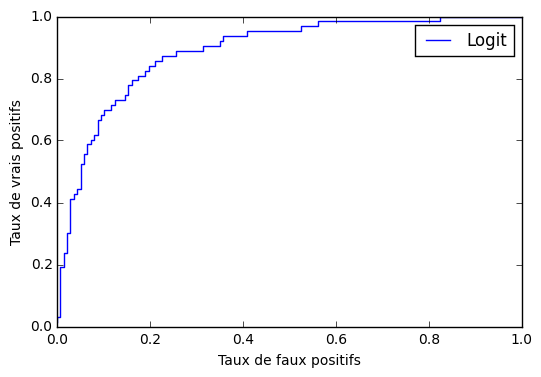

In [93]:
# Courbe ROC
probas_ = logitOpt.predict_proba(vistestq)
fpr, tpr, thresholds = roc_curve(Y_test, probas_[:,1])
plt.plot(fpr, tpr, lw=1,label="Logit")
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="best")
plt.show()

In [94]:
# Coefficients pour interprétation à comparer avec R
logitOpt.coef_

AttributeError: 'GridSearchCV' object has no attribute 'coef_'

# 3. Analyse Discriminante 

## 3.1 Estimation

In [100]:
# analyse discriminante linéaire
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis().fit(visapptr,Y)

# analyse discriminante quadratique
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis().fit(visapptr,Y)

# k plus proches voisins
from sklearn.neighbors import KNeighborsClassifier
# Optimisation de k
# grille de valeurs
param_grid=[{"n_neighbors":list(range(1,15))}]
knn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,n_jobs=-1)
knnOpt=knn.fit(visapptr, Y)  # GridSearchCV est lui même un estimateur
# paramètre optimal
knnOpt.best_params_["n_neighbors"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-knnOpt.best_score_,knnOpt.best_params_))

Meilleur score = 0.301275, Meilleur paramètre = {'n_neighbors': 14}


## 3.2 Prédiction de l'échantillon test

In [102]:
# Estimation de l'erreur de prévision sur l'échantillon test
1-lda.score(vistestr,Y_test)

0.17500000000000004

In [103]:
# Estimation de l'erreur de prévision sur l'échantillon test
1-qda.score(vistestr,Y_test)

0.25

In [101]:
# Estimation de l'erreur de prévision sur l'échantillon test
1-knnOpt.score(vistestr,Y_test)


0.28500000000000003

In [104]:
# Prévision de l'échantillon test
y_chap = lda.predict(vistestr)
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)

# Résultats R
#Cnon Coui
#Cnon  123   14
#Coui   21   42

CARVP    0   1
row_0         
0      123  21
1       14  42


In [105]:
# Prévision de l'échantillon test
y_chap = qda.predict(vistestr)
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)

# Résultats R
#Cnon Coui
#Cnon  114   23
#Coui   27   36

CARVP    0   1
row_0         
0      114  27
1       23  36


In [98]:
# Prévision de l'échantillon test
y_chap = knnOpt.predict(vistestr)
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)

# Résultats R
#Cnon Coui
#Cnon  114   38
#Coui   23   25

CARVP    0   1
row_0         
0      119  39
1       18  24


## 3.3 Courbe ROC

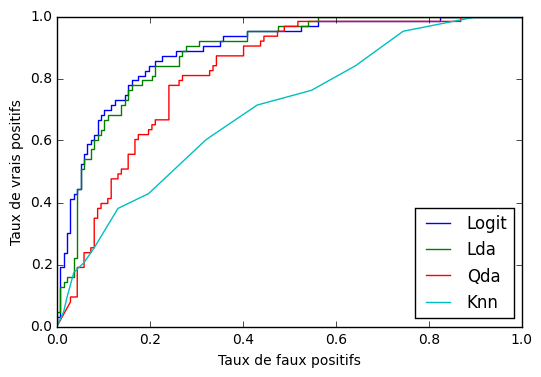

In [107]:
# Courbe 
listMethod=[["Logit",logitOpt,visapptq,vistestq],["Lda",lda,visapptr,vistestr],["Qda",qda,visapptr,vistestr],
            ["Knn",knnOpt,visapptr,vistestr]]
for method in enumerate(listMethod):
    probas_ = method[1][1].fit(method[1][2], Y).predict_proba(method[1][3])
    fpr, tpr, thresholds = roc_curve(Y_test, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="best")
plt.show()

# 4. Arbres de décisions binaires